<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
10. Bölüm - Makine Öğrenmesi II - Doğrusal Regresyon ve Kuzenleri (258-262. videolar) - Vahit Keskin anlattı. </font>

# Simple Linear Regression

### Özet 

**Data Loading**

**Data Exploring**

**Creating Model with Statsmodels**

* Bağımsız değişkeni belirliyoruz. 
* Bağımlı değişkeni belirliyoruz.
* Modeli kuruyoruz.
* Modeli X, y şeklinde değil de değişkenlerin adlarını vererek kuruyoruz. 
* Sadece kat sayıları almak istiyoruz.
* Sadece katsayıların istatistiksel değerlerini almak istiyoruz.
* Katsayıların güven aralıklarına erişmek istiyoruz.
* Modelin sadece anlamlılığına ilişkin istatistiklere erişmek istiyoruz.
* Parametrelerin anlamlılığına ilişkin değerlere erişmek istiyoruz.
* Modelin anlamlılığına ilişkin model değerlendirme istatistiklerine erişmek istiyoruz.
* Modelin tahmin ettiği değerlere erişmek istiyoruz. 
* Bir model kurduk, bu modelin denklemini ele alalım. 
* Bu modelin görsel olarak ne ifade ettiğini ele alalım. 

**Creating Model with Scikit-Learn**
* Tahmin edilen değerleri görmek istiyoruz.

**Tahmin**
* Scikit-learn ile kurmuş olduğumuz model üzerinden tahmin yapmak istiyoruz.
* Birbirinden farklı departmanlardan TV için farklı bütçe önerileri geldiğinde tüm tahminleri şu şekilde yapıyoruz.

#### Önemli Kodlar

- `sns.jointplot(x="TV", y="sales", data=df, kind="reg");` eğrisi ile bağımlı değişken ve bir bağımsız değişken arasındaki ilişkiyi gösteren bir grafik çizdik.
- `ad = pd.read_csv("Advertising.csv", usecols=[1,2,3,4])` koduyla dosyayı okurken istediğimiz sütunları almasını isteyebiliyoruz. 
- `df.corr()` koduyla değişkenlerin birbirleriyle olan korelasyonunu öğreniyoruz.
- `sns.pairplot(df, kind="reg");` kodu ile regresyon eğrisi koyarak değişkenlerin birbirleriyle olan ilişkisini görsel olarak görebiliyoruz. 
- `sns.jointplot(x="TV", y="sales", data=df, kind="reg");` ile tek bir bağımsız değişkenin bağımlı değişkenle olan korelasyonunu grafik üzerinde görebiliyoruz ve ayrı ayrı bağımsız değişkenin ve bağımlı değişkenin dağılımını grafik üzerinde görebiliyoruz.
- **Statsmodels** ile nasıl model kurulduğunu ve modele dair bilgileri nasıl aldığımızı öğrendik.
- Gerçek değerlerin noktayla gösterildiği ve onun üzerine doğrusal eğriyi yerleştirdiğimiz bir grafiği nasıl çizdiğimizi öğrendik.

### Giriş 

<font color='blue'> Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır. Hata kareler toplamını (Sum of Squares Error) minimize edecek kat sayı tahminlerini bulmaya çalışarak bu fonksiyonu bulacağız.  </font>

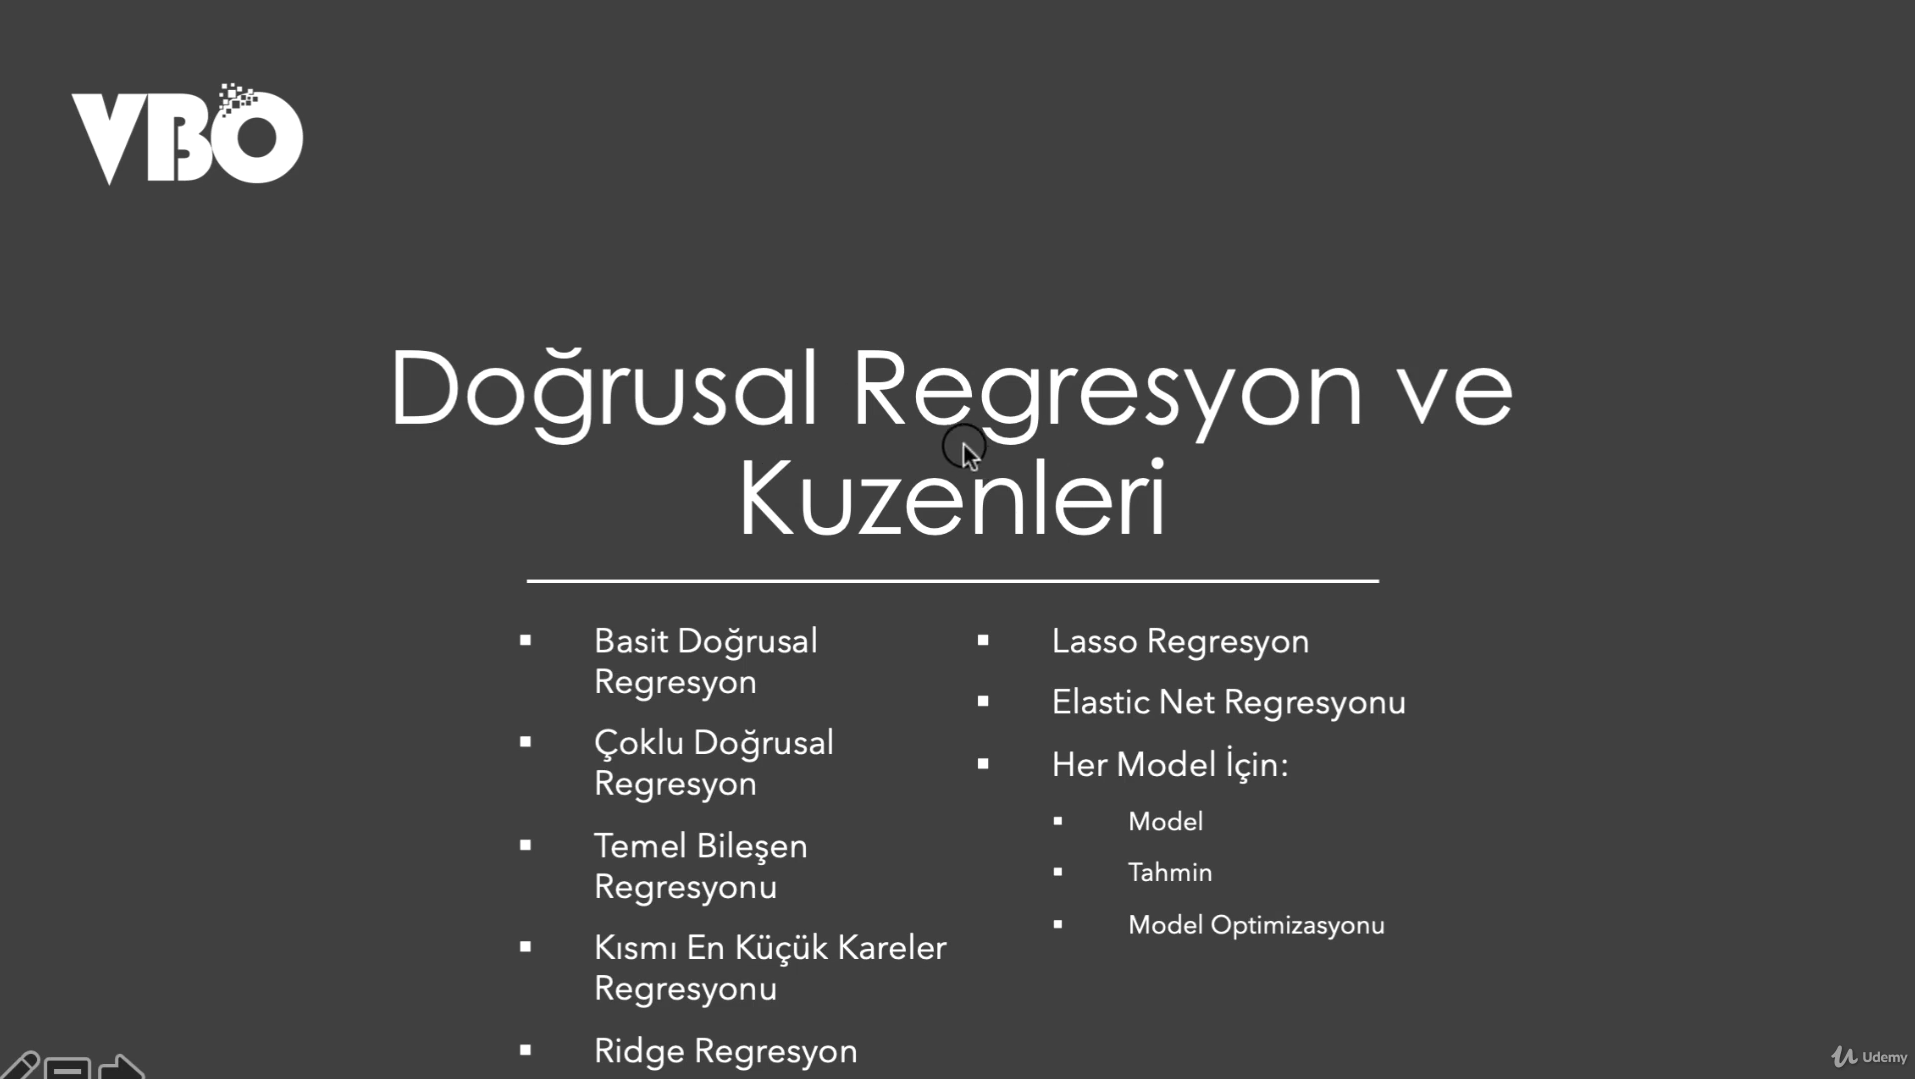

## Data Loading

In [1]:
import pandas as pd

In [2]:
ad = pd.read_csv("Advertising.csv")

<font color='blue'> Bu veri seti bir reklam harcaması kalemlerini ifade eden bir veri seti. TV, radyo veya gazeteye reklamlar veriliyor ve bu reklamlar neticesinde satışlar elde ediliyor. Bu satışlar ile farklı kalemlerde verilen reklam harcamalarının ortaya çıkardığı yapıyla ilgili bir veri seti.    </font>

In [3]:
df = ad.copy()

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Preprocessing

<font color='blue'> Indexi değişken olarak almış `df.iloc[:,1:len(df)]` koduyla bunu düzeltiyoruz.</font>

In [5]:
df = df.iloc[:,1:len(df)]

<font color='blue'> Bunu yapmak yerine en başta dosyayı okurken `ad = pd.read_csv("Advertising.csv"), usecols=[1,2,3,4]` şeklinde usecols parametresini kullanabilirdik.  </font>

In [6]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Exploring

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T # 50% medianı ifade ediyor.

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<font color='blue'> Genel olarak median ile ortalama birbirine çok yakın. Newspaperda biraz daha fazla farklılık var median ile ortalama arasında.</font>

In [10]:
df.isnull().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [11]:
df.isnull().values.any()

False

<font color='blue'> Değişkenlerin dağılımlarını ve korelasyonlarını inceliyoruz. </font>

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<font color='blue'>Tv ile satış arasında yüksek bir korelasyon var. Buna bakarak TV harcamaları arttıkça satışların da artacağını söylüyoruz ve bu pozitif yönlü kuvvetli bir ilişki. 0.78~0.80 civarında. Sales satırını incelemek daha mantıklı. Radyoyla olan korelasyonuna baktığımızda 0.57 pozitif yönlü orta şiddetli bir ilişki söz konusu, gazeteyle biraz daha az. Hiç model kurmadan en anlamlı ve en etki düzeyi yüksek olan değişken TV değişkeni çıkacaktır gibi gözükmektedir.     </font>

<font color='blue'>**Bu durumu pairplot ile de gözlemleyelim.**</font>

In [13]:
import seaborn as sns

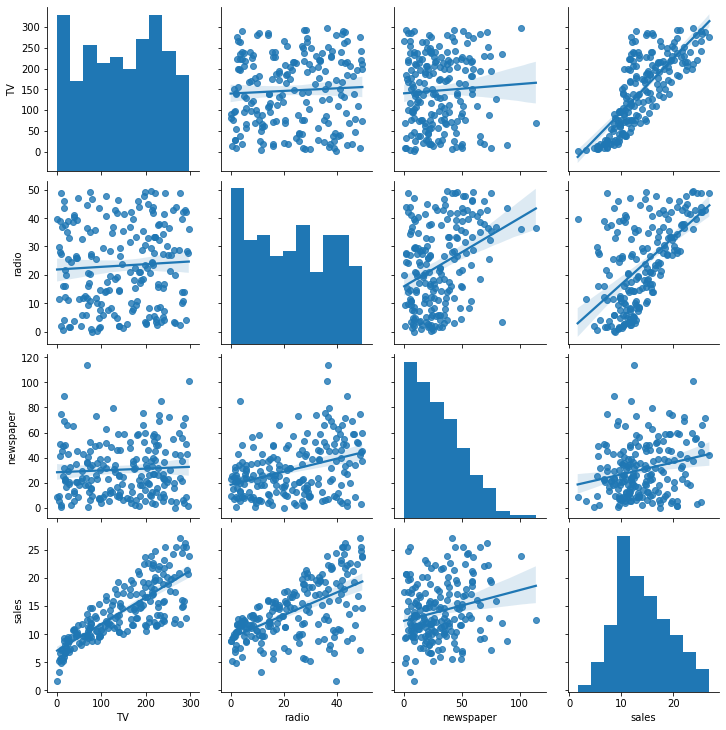

In [14]:
sns.pairplot(df, kind="reg");

<font color='blue'>Köşe dağılımlara baktığımızda sadece gazete dağılımı biraz çarpık gibi. Sales satırına göre tüm reklam araçlarını incelediğimizde TV ile sales arasındaki doğrusal pozitif yönlü kuvvetli ilişkinin bir regresyon doğrusu da koyduğumuzdaki ortaya koyduğu yapıyı görüyoruz. Radyoyla da benzer bir ilişki var. Newspaper ile ilişkinin biraz düşük olduğunu eğiminden anlayabiliyoruz. Eğim şiddeti ifade eder. Eğimin sıfırlanması artık ilişkinin kaybolduğu anlamına gelir. Aşağı doğru dönmesi negatif yönlü ilişkinin olduğu ve kuvvetlendiği anlamına gelir. </font>

<font color='blue'>**TV harcamaları ile satışlar arasındaki ilişkiye odaklanmak istediğimizi düşünelim.** </font>

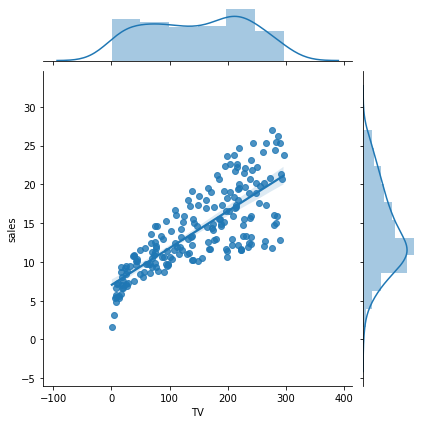

In [15]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg");

<font color='blue'>TV biraz daha iki yapılı bir haldeymiş. Sales tamamen normal dağılım seyrinde. 
    
Dağılımlarının nasıl olduğunu bilmemiz gerekir. Çünkü modelin doğruluk oranı tek başına yeterli değildir. Değişkenlerin hepsini tanımak gerekir,  birbirlerine etki düzeylerini bilmek gerekir. Çünkü değişken seçimi yapmamız, bazı değişkenleri dışarıda bırakmamız gerekecek bu yüzden dağılımlarını değerlendirmemiz gerekir. Değerlendirme yaparken de bir sürekli değişkenin dağılımının iyi olmasının değerlendirilme şekli ise o dağılımın tepeli olmaması, basık çarpık olmaması gibi durumlar olduğundan dolayı "normal dağılım seyrindeymiş bu" gibi yorumlar yapabiliyoruz.      </font>

<font color='blue'>Amaç şu anda satışlardaki varyasyonu açıklamak ise TV bunu çok güzel açıklamış. Aralarındaki korelasyon %78~80 civarında. Ayrıca baktığımızda TV ile radyo arasında çok düşük korelasyon var (%5) demek ki satışlar değişkenini modellemek için radyoyu da kullanabiliriz. Çünkü **radyoyla televizyon arasında yüksek bir korelasyon yok.** Yani satışlardaki farklı bir varyasyonu radyo değişkeninin de açıklayabiliyor olabileceği durumu söz konusu. Bu sebeple hem birbirleriyle olan ilişkisine hem de bağımlı değişkeni (sales) etkileme düzeylerine bakıyoruz.   </font>

## Creating Model with Statsmodels

In [16]:
import statsmodels.api as sm

<font color='blue'>Basit doğrusal regresyon modeli yapacağımız için tek değişkenli bir modelleme yapacağız. </font>

#### <font color='green'>Bağımsız değişkeni belirliyoruz. </font>

In [17]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


<font color='blue'>Elimizde tek değişkenden oluşan bir matris var. TV değişkenini X matrisi olarak kaydettik. Matris işlemlerinin yapılabilmesi için sabit bir 1 ekleyeceğiz dataframe'e.</font>

In [18]:
X = sm.add_constant(X)

In [19]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


#### <font color='green'>Bağımlı değişkeni belirliyoruz. </font>

In [20]:
y = df["sales"]

In [21]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

#### <font color='green'>Modeli kuruyoruz. </font>

In [22]:
lm = sm.OLS(y,X) # object oluşturmuş oluyoruz bu şekilde.

In [23]:
model = lm.fit()

In [24]:
model.summary() 
# bu kadar detaylı özet alabilmek için scikit learn kütüphanesini kullanmak yerine 
# statsmodels.api kütüphanesini kullandık.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        10:54:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='blue'>
    
* **R-squared**: Bağımsız değişkenin bağımlı değişkendeki değişkenliğini açıklama başarısıdır. Burada elimizdeki TV değişkeni satış değişkeninde yer alan değişkenliğin yaklaşık %60'ını açıklayabilmektedir.
    
* **Adj. R-squared (Düzeltilmiş R^2)**: Düzeltilmiş R^2 ile R^2 arasında ne fark var? R^2 değeri formülasyonu itibariyle modele ne kadar fazla değişken eklersek ekleyelim şişmeye meyillidir, artacaktır. Dolayısıyla modelde ilgili ilgisiz, anlamlı anlamsız değişken olması durumunda R^2 artacaktır. R^2 açıklanabilirlik oranıdır. Dolayısıyla *modele ilgili ilgisiz birçok değişken ekleyip R^2'nin arttığını gördüğümüzde iyi bir yolda olduğumuzu düşünebiliriz, bu çok yanıltıcı bir durumdur.* Düzeltilmiş R^2, R^2'nin her parametre eklenmesine karşı olan duyarlılığını törpüleyen, düzenleyen, duyarlılığı daha az olan bir metriktir. Şu an bu problem için çok geçerli olmasa da birden fazla, belki onlarca değişken olduğunda düzeltilmiş R^2 değeri bizim için daha düzgün bir değerdir. 
* **F-statistic**: Modelin anlamlılığının anlaşılması için kurulan test istatistiğidir. Örneğin bu modeli kurduk, model bize bazı tahminler verecek, belli başarısı olacak vs. ama bu model anlamlı mı gibi bir soruya ilişkin bilgi veren istatistiktir bu. 
    
* **Prob(F-statistic)**: Modelin anlamlılığına ilişkin f istatistiğinin p-value değeridir. Burada Prob olarak ifade edilmiş bazı yerlerde Signifance olarak ifade ediliyor. 
    p-value ve f-istatistiği değeri incelendiğinde modelin anlamlı olduğu gözükmektedir.
    
* **AIC**, **BIC** gibi model karşılaştırma için kullanılan istatistiksel değerler.
    
* **No. Observations**: Gözlem sayısı
    
* **Df Residuals**: Serbestlik derecesi

</font>

<font color='blue'> coef sütununda yer alan const ve Tv değerleri modelde kullandığımız bağımsız değişkenimizin kat sayısı (TV) ve sabit katsayı (const) ifadelerinin yorumlanmaları en önemli kısımı oluşturuyor. Parametre konusunu regresyon problemleri anlamında ele alırsak parametre teorik olarak gösterdiğimiz ana kitleye ilişkin B0 ve B1 değerleri. Kat sayılar ise model üzerinden hesaplamış olduğumuz b0 ve b1 değerleri. Burada kat sayılar coef sütununda ifade edilmiş. b0 const rowunda, b1 TV rowunda gösterilmiş.

Burada verilen standard errorlerin anlamlı olup olmadığını anlamak adına t-istatistiği ve t istatistiğine ilişkin p-value değerleri verilmiş. İkisinin de anlamlı olduğu gözüküyor. Bir de bu kat sayların güven aralığı verilmiş. Bu test çıktısı şunu diyor yani: bizim hesaplamış olduğumuz TV'ye ilişkin 0.0475 şeklinde olan kat sayımız istatistiksel olarak  anlamlıdır. Ve bu katsayı yine istatistiksel olarak %95 güvenirlilik ile bu aralıklarda yer alacaktır. </font>

<font color='blue'>Kat sayıları değerlendirecek olursak y eksenini kestiği nokta 7.0326. Dolayısıyla diğer değişkenlerde hiçbir değişiklik olmadığında y'nin beklenilen değeridir, ortalama satıştır. Yani TV'nin bir etkisi olmadığında satışlarda zaten olmasını beklediğimiz ortalama satış miktarı 7.03'tür. 0.0475'i değerlendirecek olursak; TV harcamalarında 1 birimlik artış olduğunda satışlarda 0.0475'lik ortalama artış olması beklenir şeklinde yorumlanır. Burada 5-10 tane değişken olsa her bir değişkenin bağımlı değişkene olan etkisini görebilirdik, bu yüzden çok değerli bir bilgi bu.   </font>

#### <font color='green'>Modeli X, y şeklinde değil de değişkenlerin adlarını vererek kuruyoruz. </font>

<font color='blue'>Değişkenleri ifade etme şeklimize gelecek olursak `lm = sm.OLS(y,X)` burada y, X yazmışız mesela. Bunu farklı bir şekilde de ele alabiliriz.   </font>

In [25]:
import statsmodels.formula.api as smf

In [26]:
lm = smf.ols("sales ~ TV", df) # değişkenleri bu şekilde isimlendirerek yazabiliyoruz.
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        10:54:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color='green'>Sadece kat sayıları almak istiyoruz. </font>

In [27]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

<font color='blue'>Intercept:b0, TV: b1 değeri. </font>

#### <font color='green'>Sadece katsayıların istatistiksel değerlerini almak istiyoruz.</font>

In [28]:
model.summary().tables[1] 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


#### <font color='green'>Katsayıların güven aralıklarına erişmek istiyoruz.</font>

In [29]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


#### <font color='green'>Modelin sadece anlamlılığına ilişkin istatistiklere erişmek istiyoruz.</font>

In [30]:
model.f_pvalue #p-value değeri veriyor.

1.467389700194647e-42

In [31]:
print("f_pvalue: ", "%.4f" %model.f_pvalue) #e'den kurtulmak için böyle yazalım dedik.

f_pvalue:  0.0000


In [32]:
print("fvalue: ", "%2f" %model.fvalue)

fvalue:  312.144994


#### <font color='green'>Parametrelerin anlamlılığına ilişkin değerlere erişmek istiyoruz.</font>

In [33]:
print("tvalue: ", "%2f" %model.tvalues[0:1])

tvalue:  15.360275


#### <font color='green'>Modelin anlamlılığına ilişkin model değerlendirme istatistiklerine erişmek istiyoruz.</font>

In [34]:
model.mse_model # hata kareler ortalaması
# Ortalaması 14 olan bir değişken (sales) için böyle bir hata çok korkunç bir sayı.

3314.618166868649

In [35]:
model.rsquared # Gerçek hayat için açıklanabilirlik oranı normal. 

0.611875050850071

In [36]:
model.rsquared_adj #düzeltilmiş r^2

0.6099148238341623

#### <font color='green'>Modelin tahmin ettiği değerlere erişmek istiyoruz. </font>

In [37]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [38]:
y[0:5] #gerçek y değerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

#### <font color='green'>Bir model kurduk, bu modelin denklemini ele alalım. </font>

In [39]:
print("Sales = " + str("%.2f" % model.params[0]+ " + TV" + "*" + str("%.2f" % model.params[1])))

Sales = 7.03 + TV*0.05


<font color='blue'>Ben bu yıl TV reklamlarına 10K yatırım yaptım diyelim. Bu durumda satışlarımız ne olur? x yerine 10K yazıp çıkan sonucu veriyoruz.  </font>

#### <font color='green'>Bu modelin görsel olarak ne ifade ettiğini ele alalım. </font>

<font color='blue'>Modeli kurmadan da çizebiliyoruz bunu. </font>

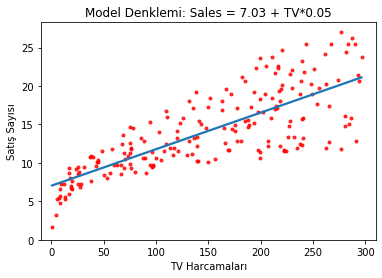

In [40]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Creating Model with Scikit-Learn

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression() # object oluşturmuş oluyoruz bu şekilde.
model = reg.fit(X,y) # Modeli asıl kurma işlemini daha sonra gerçekleştiriyoruz bu şekilde.

In [43]:
model.summary() # böyle bir çıktı vermiyor bu kütüphane.

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [44]:
model.intercept_

7.032593549127693

In [45]:
model.coef_

array([0.04753664])

In [46]:
model.score(X,y) # R^2 değeri bu. Başarı tahmini falan değil.

0.611875050850071

#### <font color='green'>Tahmin edilen değerleri görmek istiyoruz.</font>

In [47]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model denklemi:

Sales=7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [48]:
7.03 + 30*0.04

8.23

#### <font color='green'>Scikit-learn ile kurmuş olduğumuz model üzerinden tahmin yapmak istiyoruz.</font>

In [49]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression() 
model = reg.fit(X,y)

<font color='blue'>model.predict() fonksiyonu verdiğimiz değeri denkleme yerleştirecek. İki köşeli parantezin içine değeri yazıyoruz.  </font>

In [51]:
model.predict([[30]]) # biz 7.03.. virgülden sonraki değerleri tam almamıştık, ondan farklı çıktı.

array([8.45869276])

#### <font color='green'>Birbirinden farklı departmanlardan TV için farklı bütçe önerileri geldiğinde tüm tahminleri şu şekilde yapıyoruz.</font>

In [52]:
yeni_veri = [[5],[90],[200]]

In [53]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])